<a href="https://colab.research.google.com/github/pistachionet/CMSC141-proj4/blob/main/Misaghian_Garret_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install imbalanced-learn tqdm

In [62]:
def prepare_data(df):
    # Only use Amount for prediction
    X = df[['Amount']]
    y = df['Class']

    # Print basic information
    print("\nDataset information:")
    print(f"Total transactions: {len(df)}")
    print(f"Fraud cases: {len(df[df['Class'] == 1])}")
    print(f"Non-fraud cases: {len(df[df['Class'] == 0])}")
    print(f"Fraud percentage: {(len(df[df['Class'] == 1]) / len(df)) * 100:.3f}%")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Scale the Amount feature
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [63]:
def apply_smote(X_train, y_train):
    print("\nApplying SMOTE...")
    print(f"Original dataset shape: {np.bincount(y_train)}")

    # Using smaller sampling strategy for speed
    smote = SMOTE(sampling_strategy=0.05, random_state=42)
    print("Creating synthetic samples...")
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    print(f"Resampled dataset shape: {np.bincount(y_train_smote)}")
    return X_train_smote, y_train_smote

def train_model(X_train, y_train):
    # Using fewer trees for faster training
    gb_classifier = ProgressGradientBoostingClassifier(
        n_estimators=50,
        learning_rate=0.15,
        max_depth=3,
        random_state=42,
        verbose=0
    )
    gb_classifier.fit(X_train, y_train)
    return gb_classifier

In [64]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Plot Amount distribution
    plt.figure(figsize=(10, 6))
    plt.hist(X_test[y_test == 0], bins=50, alpha=0.5, label='Normal', density=True)
    plt.hist(X_test[y_test == 1], bins=50, alpha=0.5, label='Fraud', density=True)
    plt.title('Amount Distribution: Fraud vs Normal Transactions')
    plt.xlabel('Standardized Amount')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

Loading dataset...

Dataset shape: (142404, 31)
Memory usage: 34.77 MB

Dataset information:
Total transactions: 142404
Fraud cases: 246
Non-fraud cases: 142158
Fraud percentage: 0.173%

Applying SMOTE...
Original dataset shape: [113726    197]
Creating synthetic samples...
Resampled dataset shape: [113726   5686]

Training the model...


Training Progress:   0%|          | 0/50 [00:00<?, ?it/s]


Evaluating the model...

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.08      0.06      0.07        49

    accuracy                           1.00     28481
   macro avg       0.54      0.53      0.53     28481
weighted avg       1.00      1.00      1.00     28481



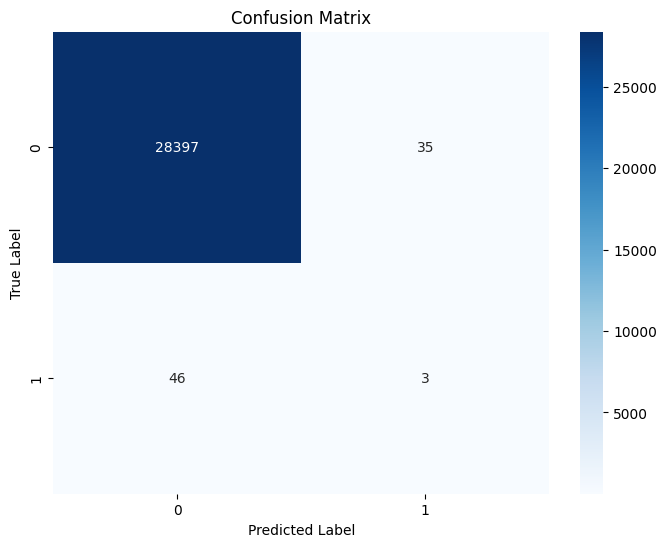

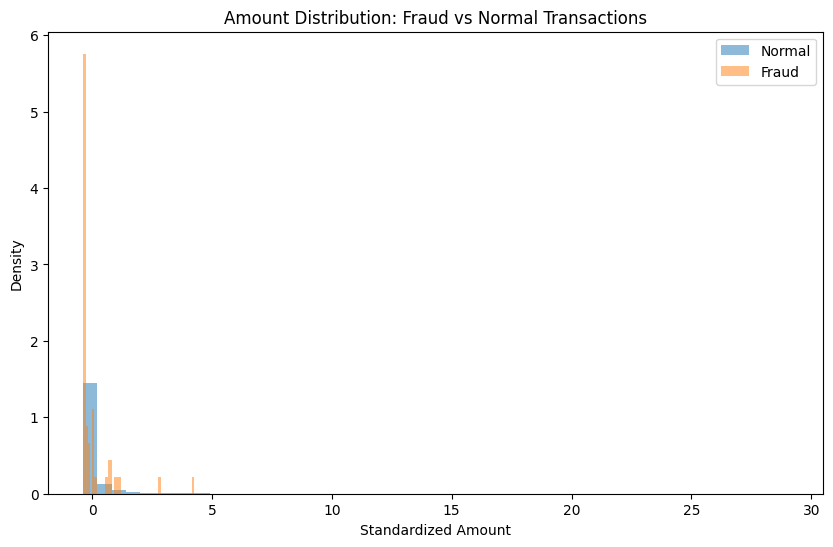

In [65]:
# Load the dataset
print("Loading dataset...")
df = pd.read_csv('creditcard.csv')

# Take a 50% sample for faster processing
df = df.sample(frac=0.5, random_state=42)

print(f"\nDataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

# Prepare the data
X_train_scaled, X_test_scaled, y_train, y_test = prepare_data(df)

# Apply SMOTE and train
X_train_smote, y_train_smote = apply_smote(X_train_scaled, y_train)

print("\nTraining the model...")
model = train_model(X_train_smote, y_train_smote)

print("\nEvaluating the model...")
evaluate_model(model, X_test_scaled, y_test)